In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, f1_score, recall_score,\
precision_score, roc_auc_score
from sklearn.model_selection import train_test_split # simple TT split cv
from keras.utils import to_categorical


from tensorflow import keras
from tensorflow.keras import layers
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform
from plotnine import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Android_Malware.csv')
data.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

##Data Visualization and Exploration




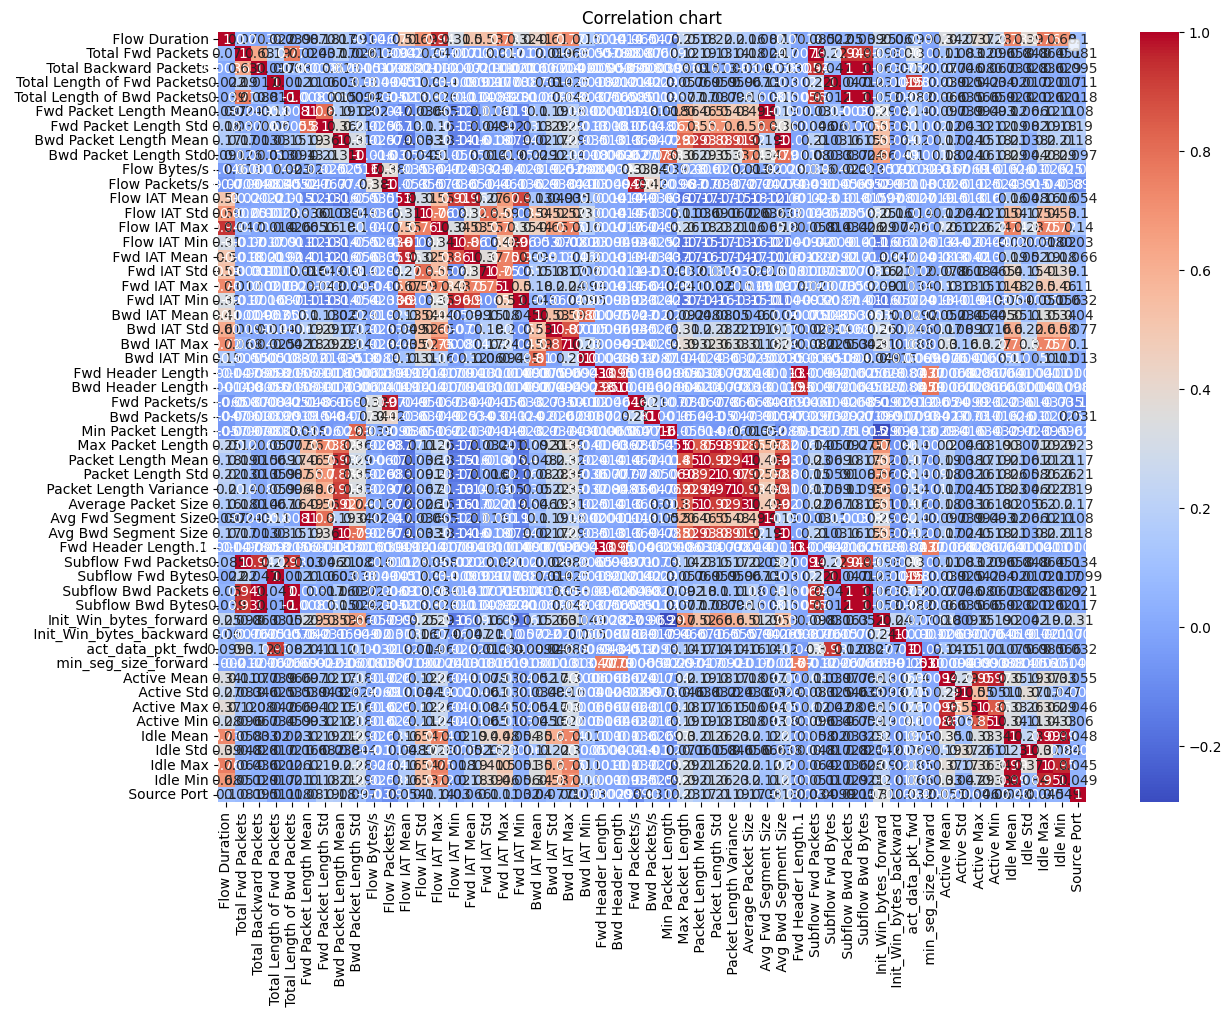

In [4]:
selected_columns = [' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',' Down/Up Ratio',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min', ' Destination IP',' Source Port']
df_corr = data[selected_columns]

corr_matrix = df_corr.corr()
#print(corr_matrix)
plt.figure(figsize=(14, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation chart")
plt.legend()
plt.show()

In [5]:
data[' Source Port'].value_counts()


443      19817
80       13881
0         2177
60774     1511
43477      757
         ...  
25755        1
28274        1
16798        1
10258        1
9320         1
Name:  Source Port, Length: 51343, dtype: int64

In [6]:
import pandas as pd

# Select specific columns
data = data[[' Source IP',' Protocol', ' Packet Length Mean',
       ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets',' Fwd IAT Min',
        ' Bwd IAT Min','Flow Bytes/s',' Flow Packets/s',
       ' Fwd Header Length',
       'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' ECE Flag Count',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', 'Active Mean',
       'Idle Mean','Label',' Destination IP',' Source Port', ' Flow IAT Min']]

In [7]:
data = data.dropna()
data.shape

(355626, 27)

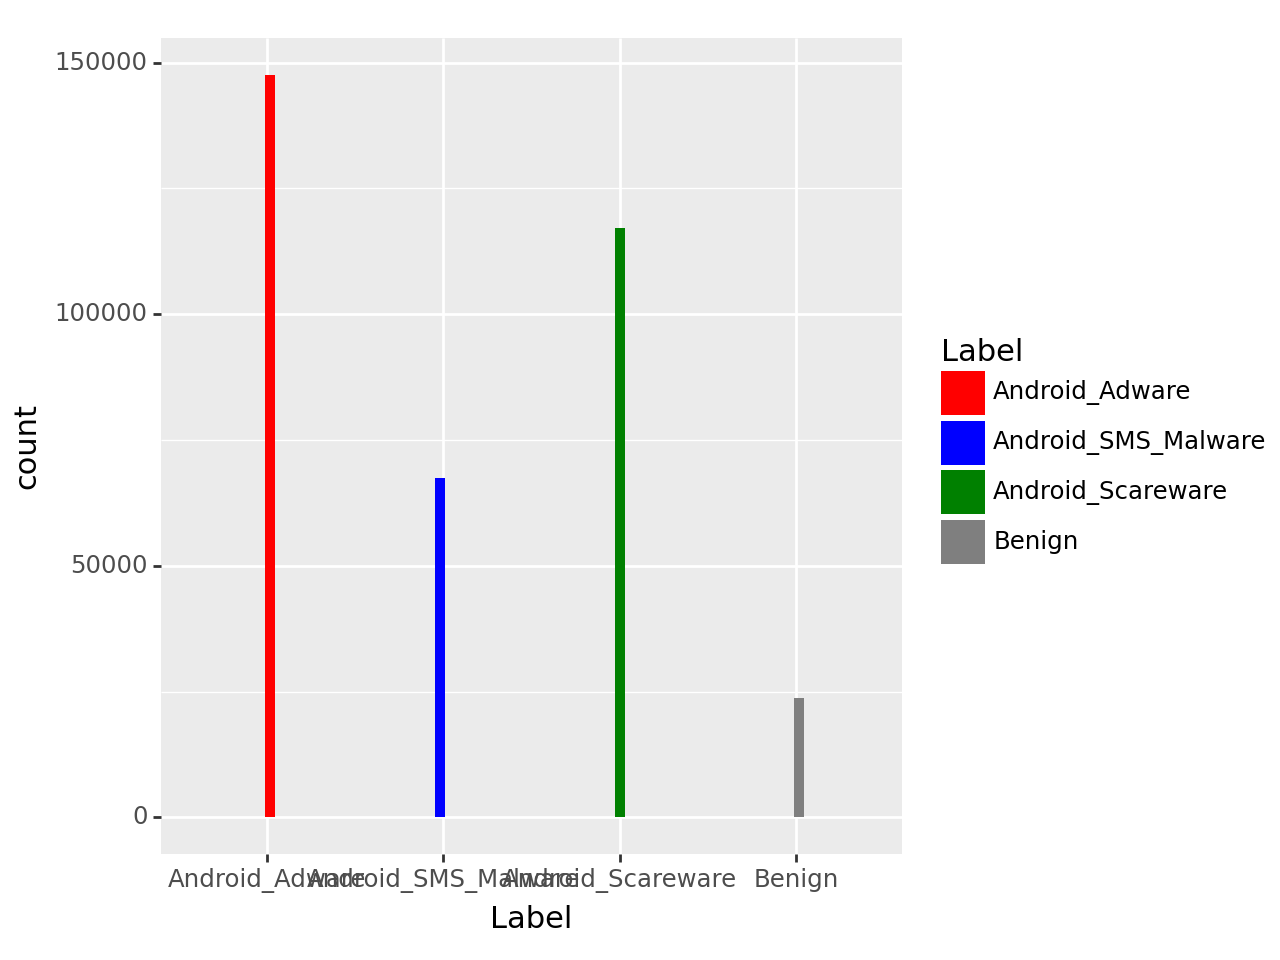

In [8]:
plot = ggplot(data, aes(x='Label', fill='Label')) + geom_histogram()
plot = plot + scale_fill_manual(values=['red', 'blue', 'green'])  # Add more colors as needed

# Display the plot
print(plot)

In [9]:
data['Label'].value_counts()

Android_Adware         147443
Android_Scareware      117081
Android_SMS_Malware     67394
Benign                  23708
Name: Label, dtype: int64

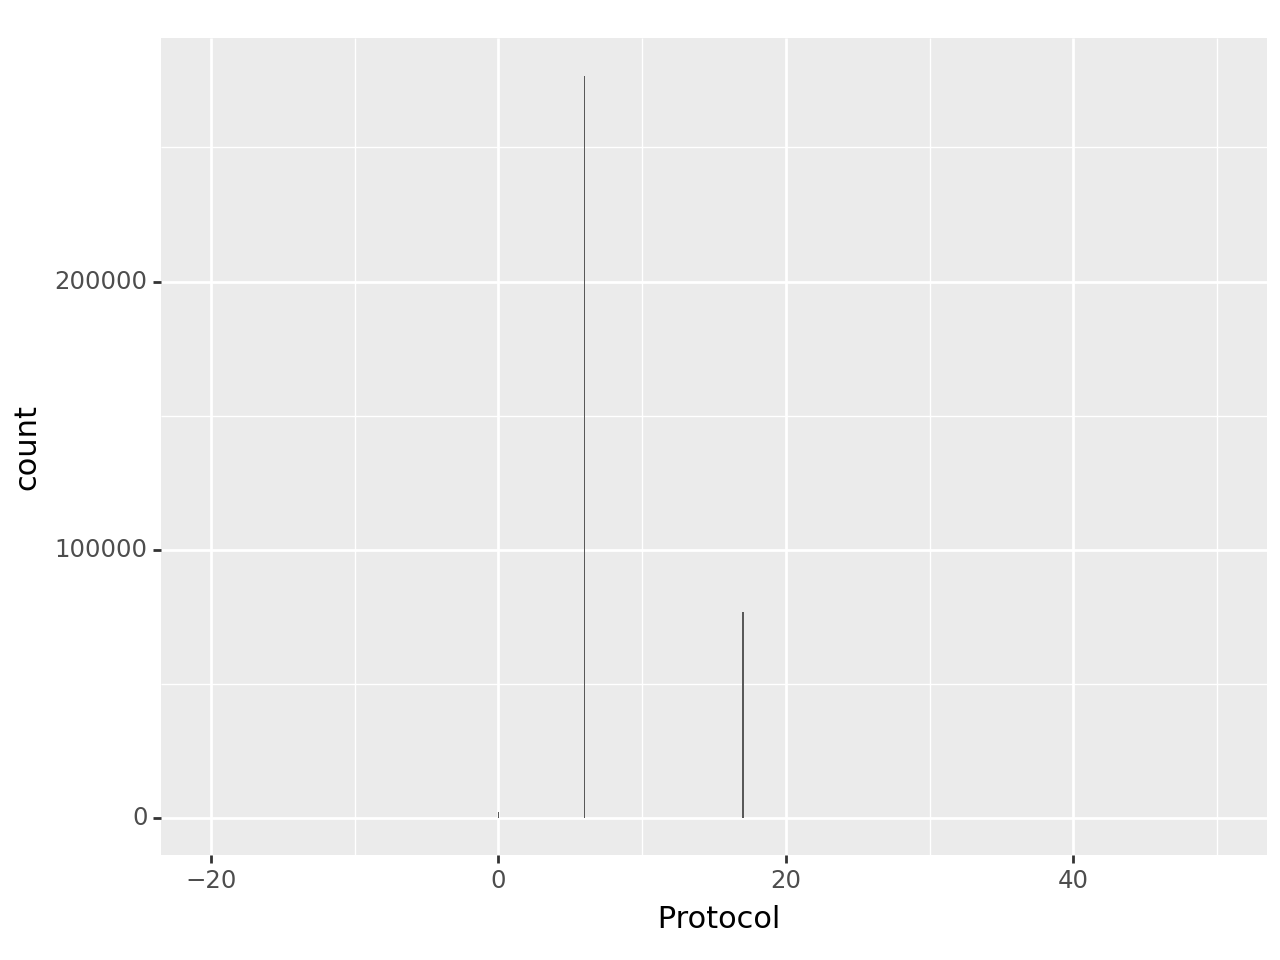

<Figure Size: (640 x 480)>

In [10]:
(ggplot(data, aes(x = ' Protocol')) + geom_histogram() + xlim(-20, 50))

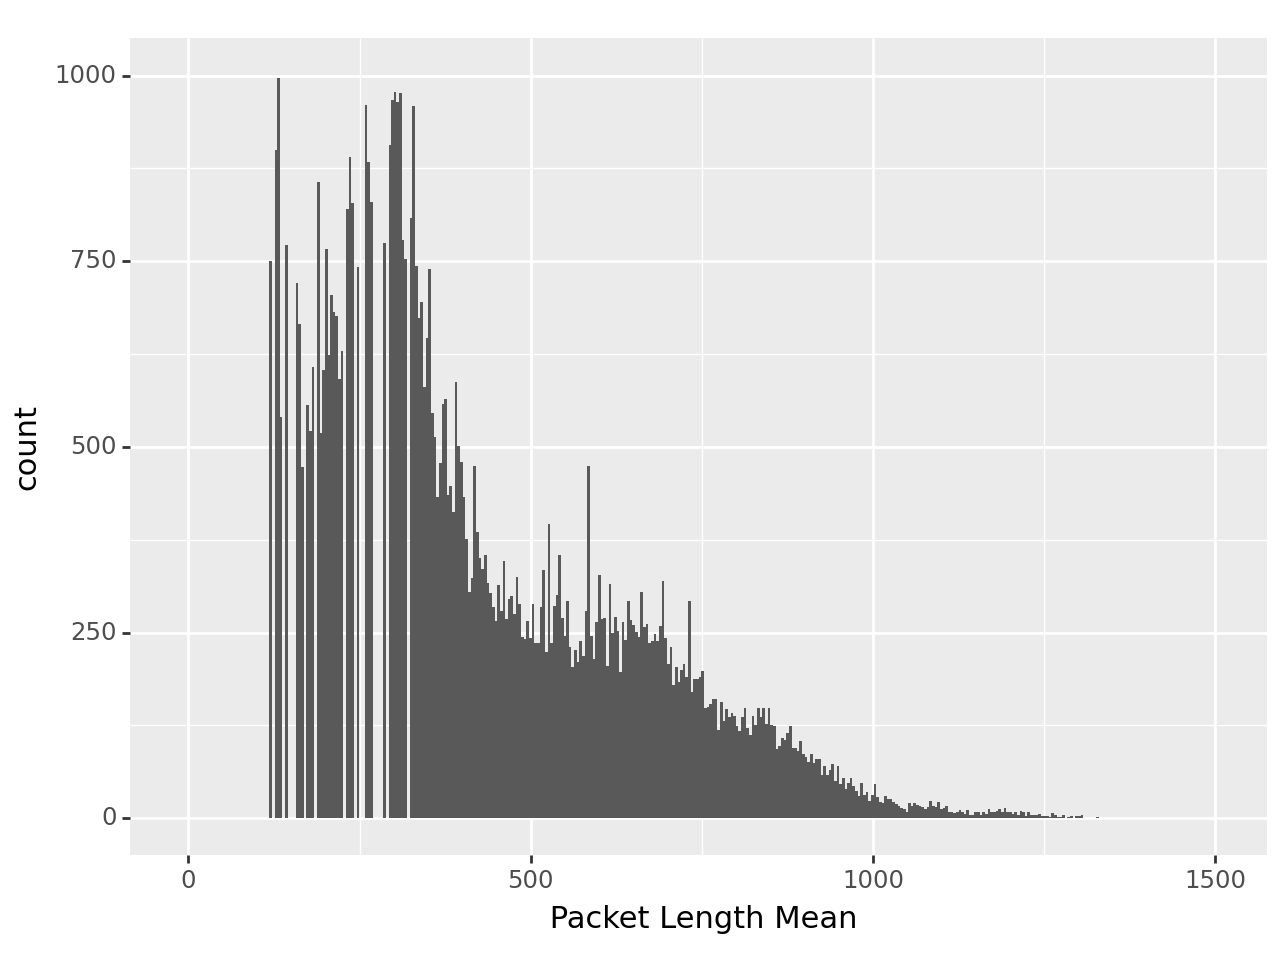

<Figure Size: (640 x 480)>

In [11]:
(ggplot(data, aes(x = ' Packet Length Mean')) + geom_histogram() + xlim(-10,1500) + ylim(0, 1000))

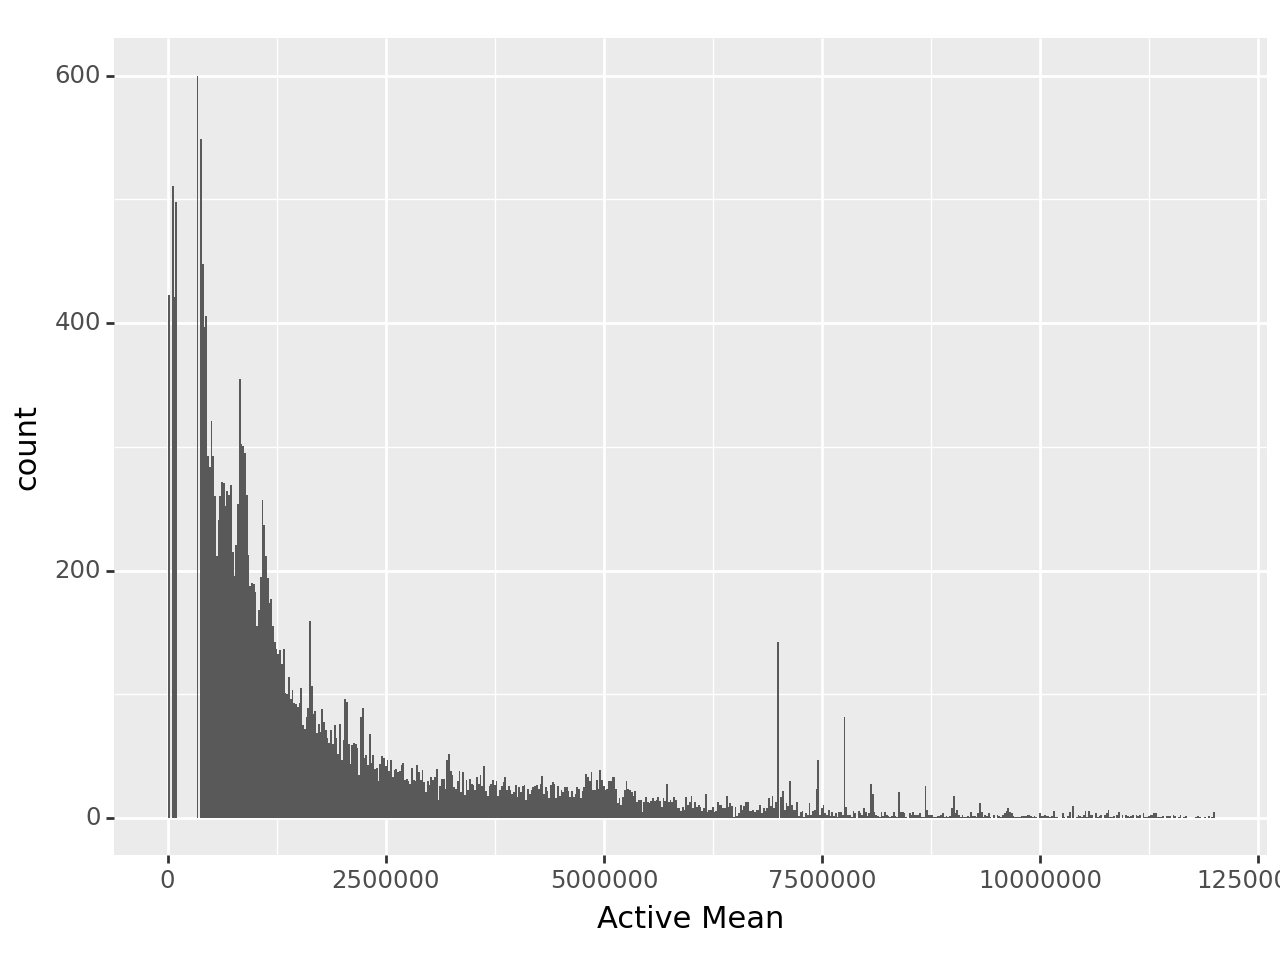

<Figure Size: (640 x 480)>

In [12]:
(ggplot(data, aes(x = "Active Mean")) + geom_histogram() + xlim(-10000,12000000) + ylim(0, 600) )

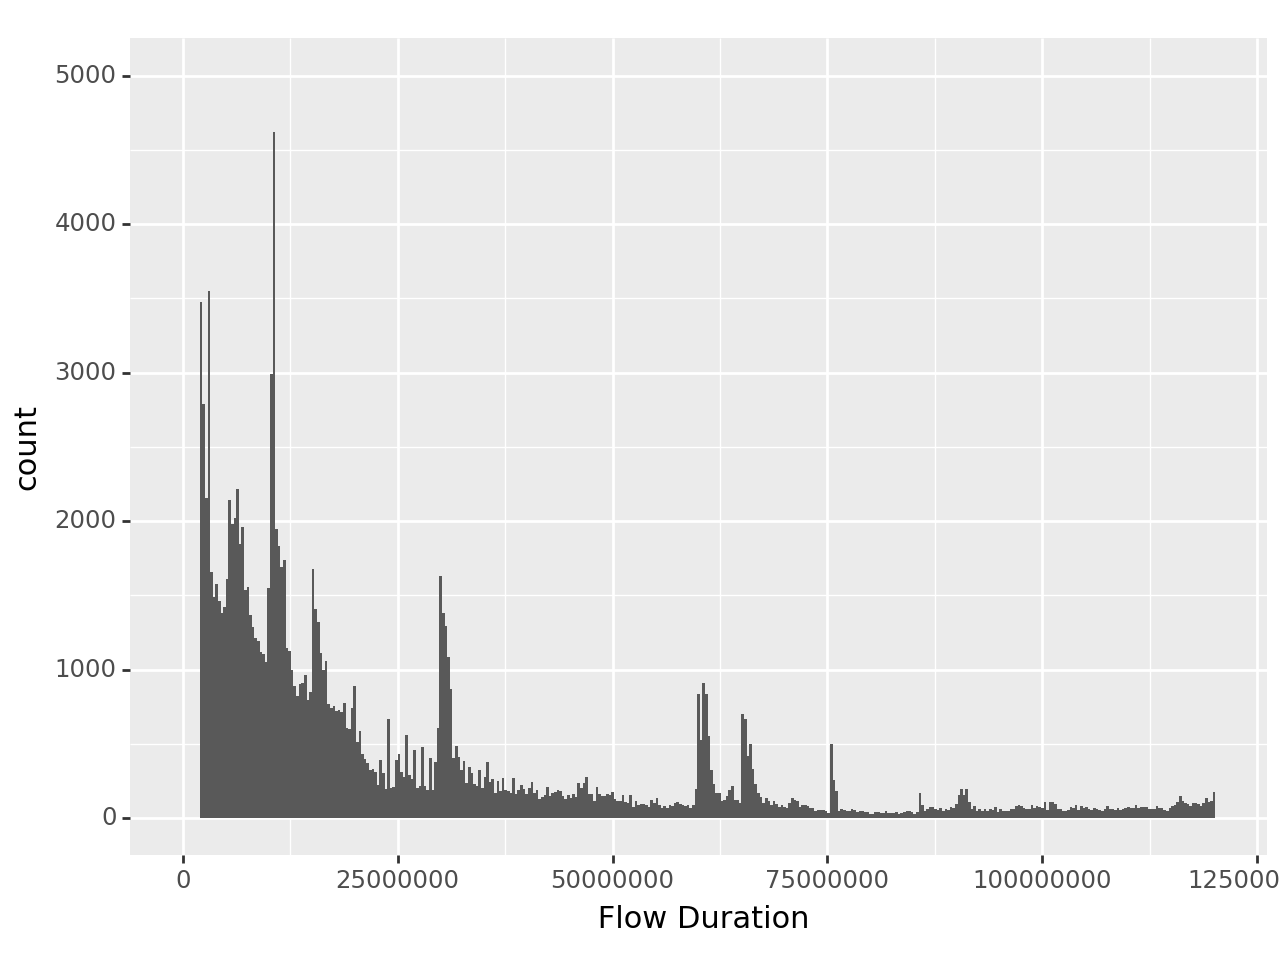

<Figure Size: (640 x 480)>

In [13]:
(ggplot(data, aes(x = " Flow Duration")) + geom_histogram() + ylim(0, 5000) )

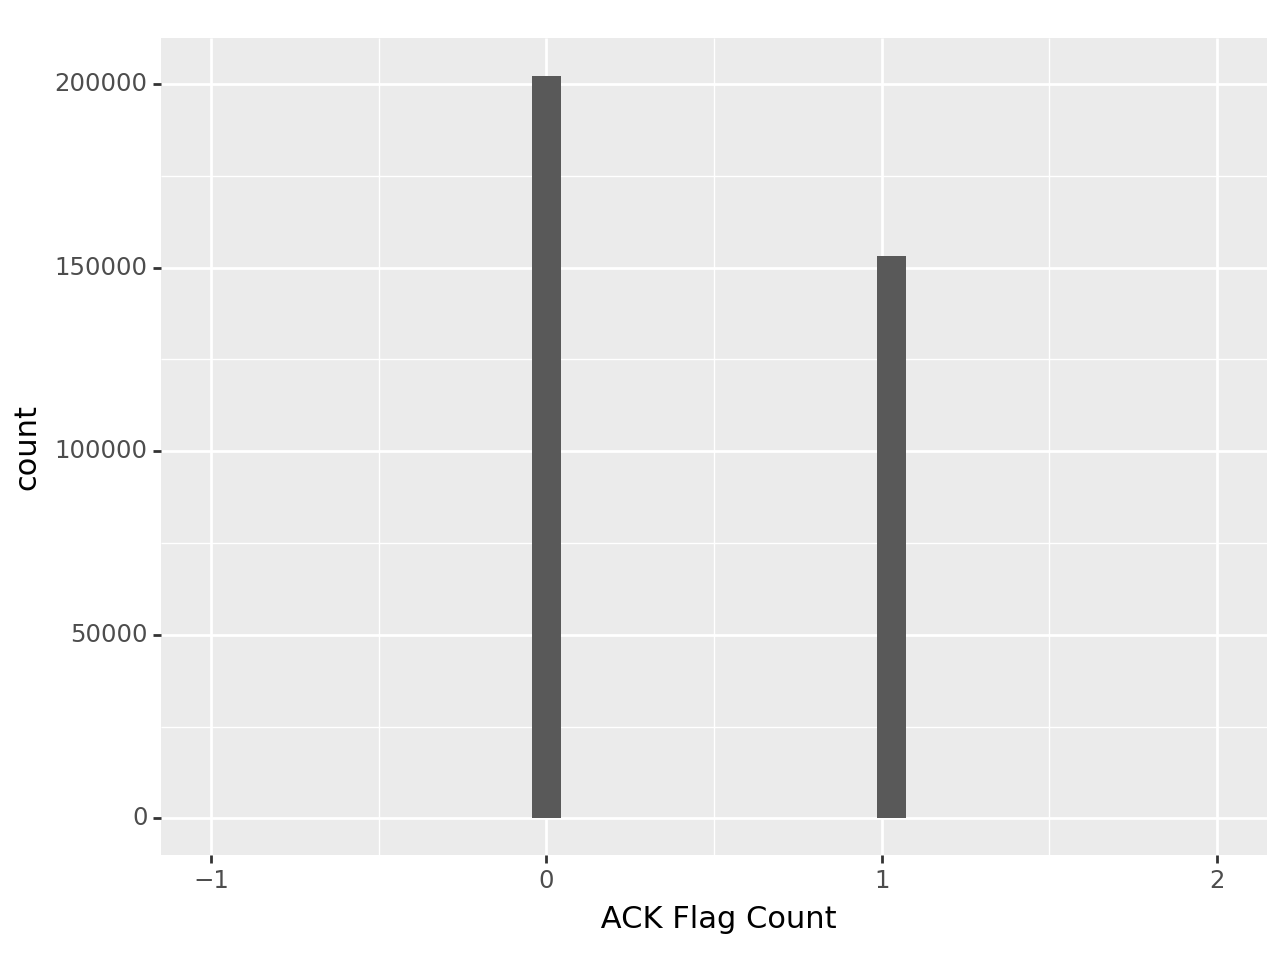

<Figure Size: (640 x 480)>

In [14]:
(ggplot(data, aes(x = " ACK Flag Count")) + geom_histogram() + xlim(-1,2))

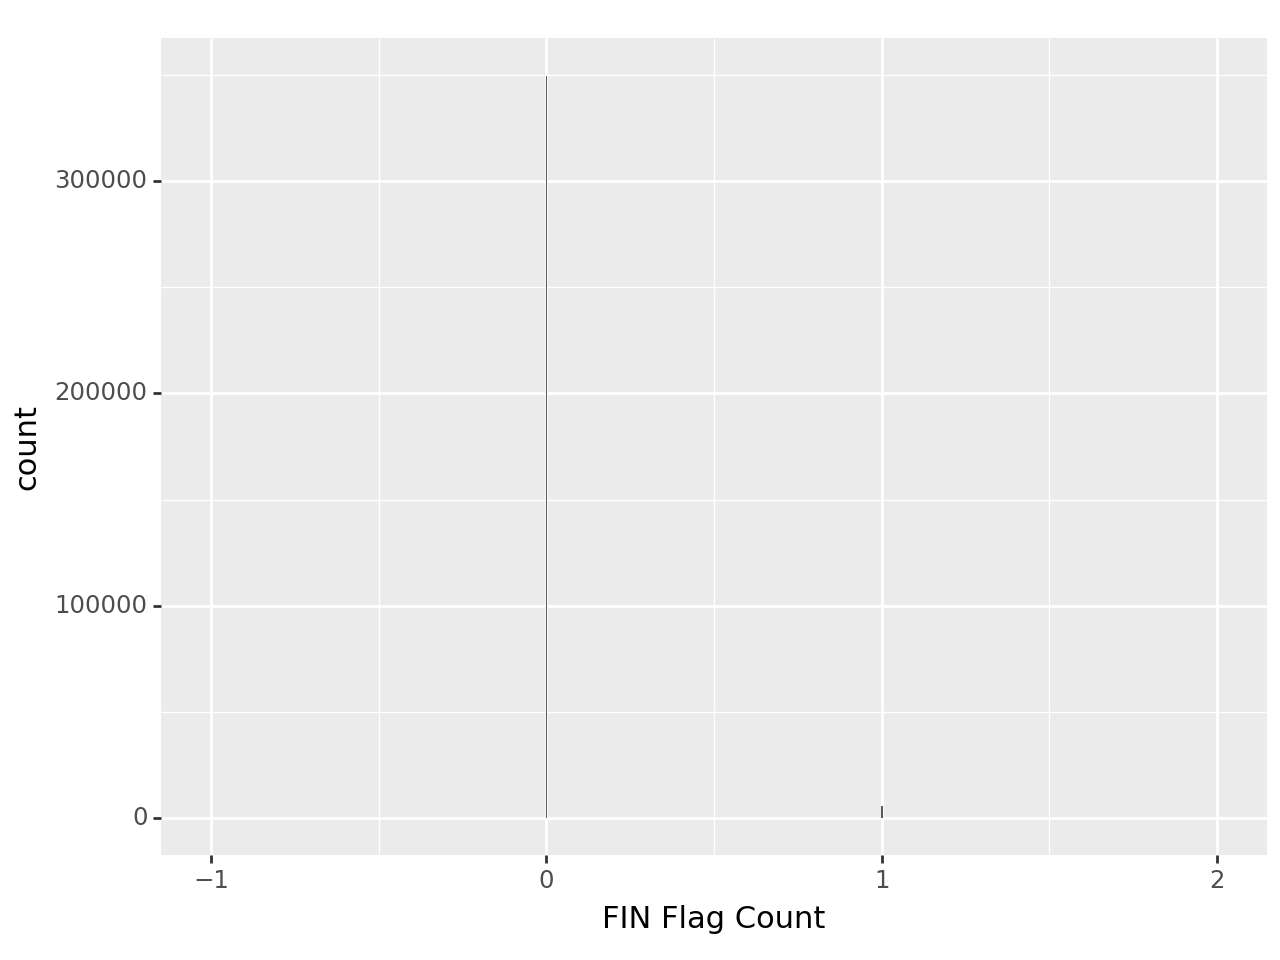

<Figure Size: (640 x 480)>

In [15]:
(ggplot(data, aes(x = "FIN Flag Count")) + geom_histogram() + xlim(-1,2))

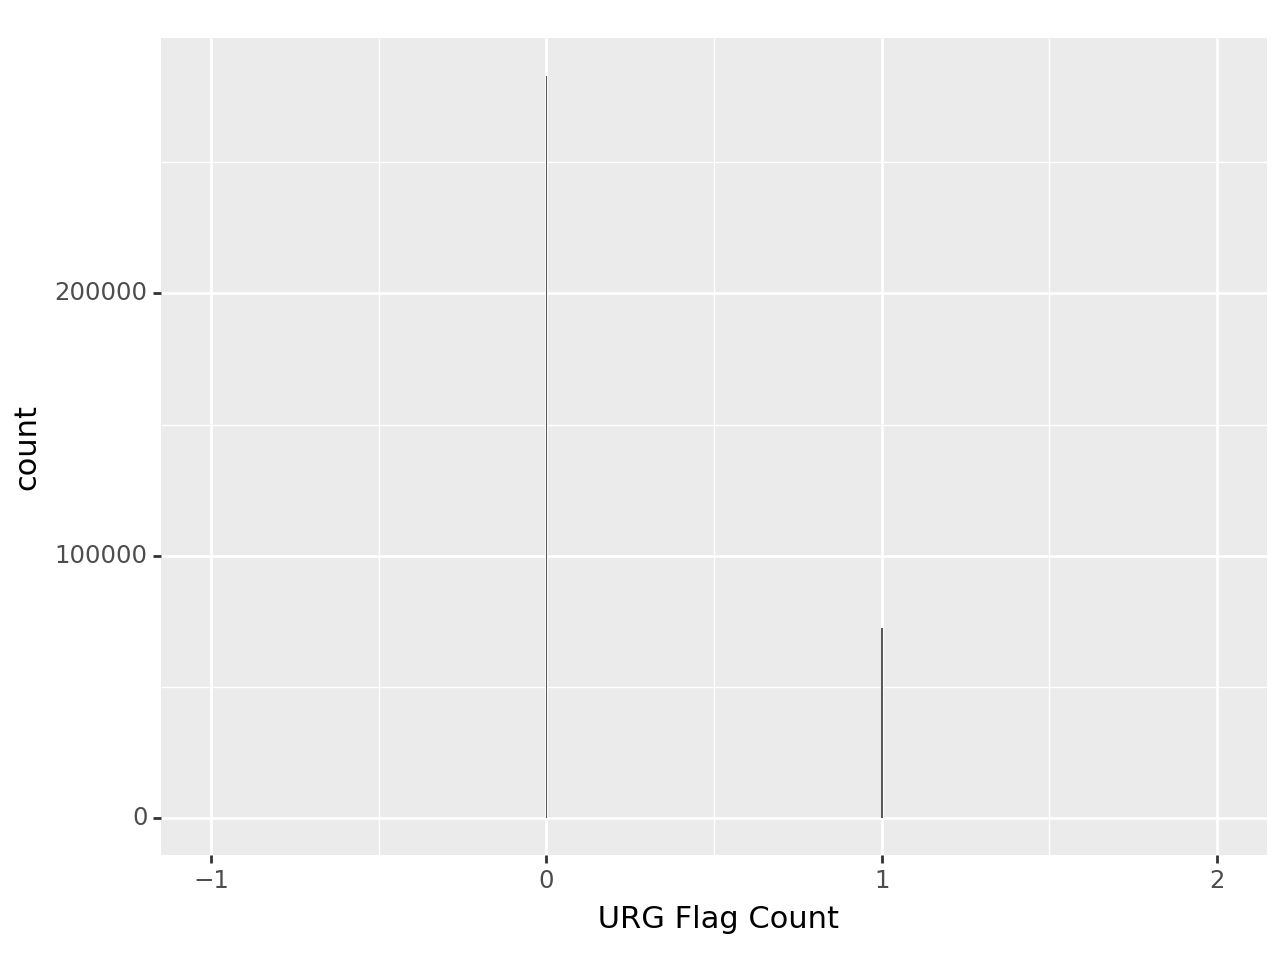

<Figure Size: (640 x 480)>

In [16]:
(ggplot(data, aes(x = " URG Flag Count")) + geom_histogram() + xlim(-1,2))

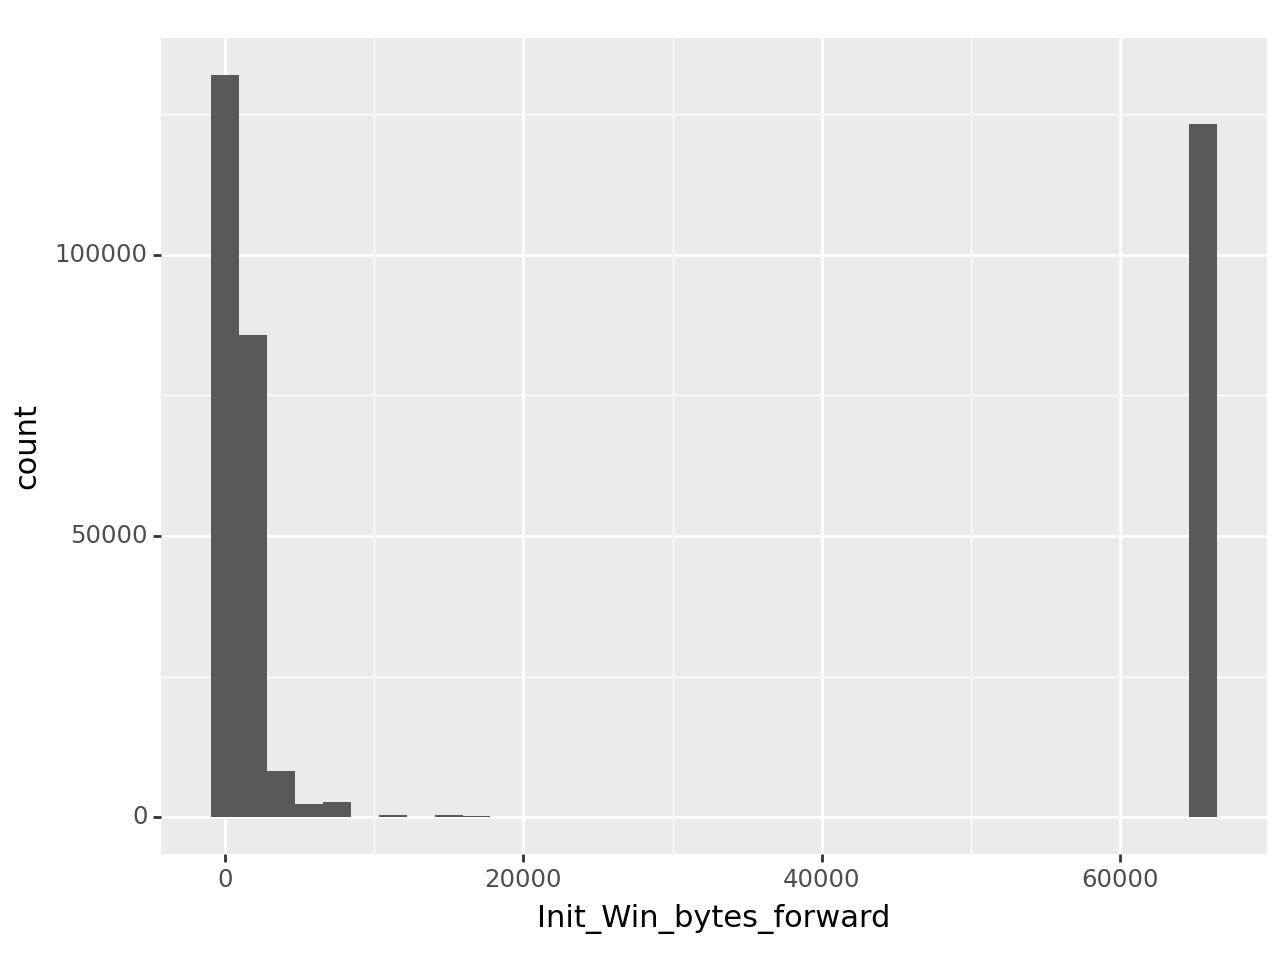

<Figure Size: (640 x 480)>

In [17]:
(ggplot(data, aes(x = 'Init_Win_bytes_forward')) + geom_histogram())

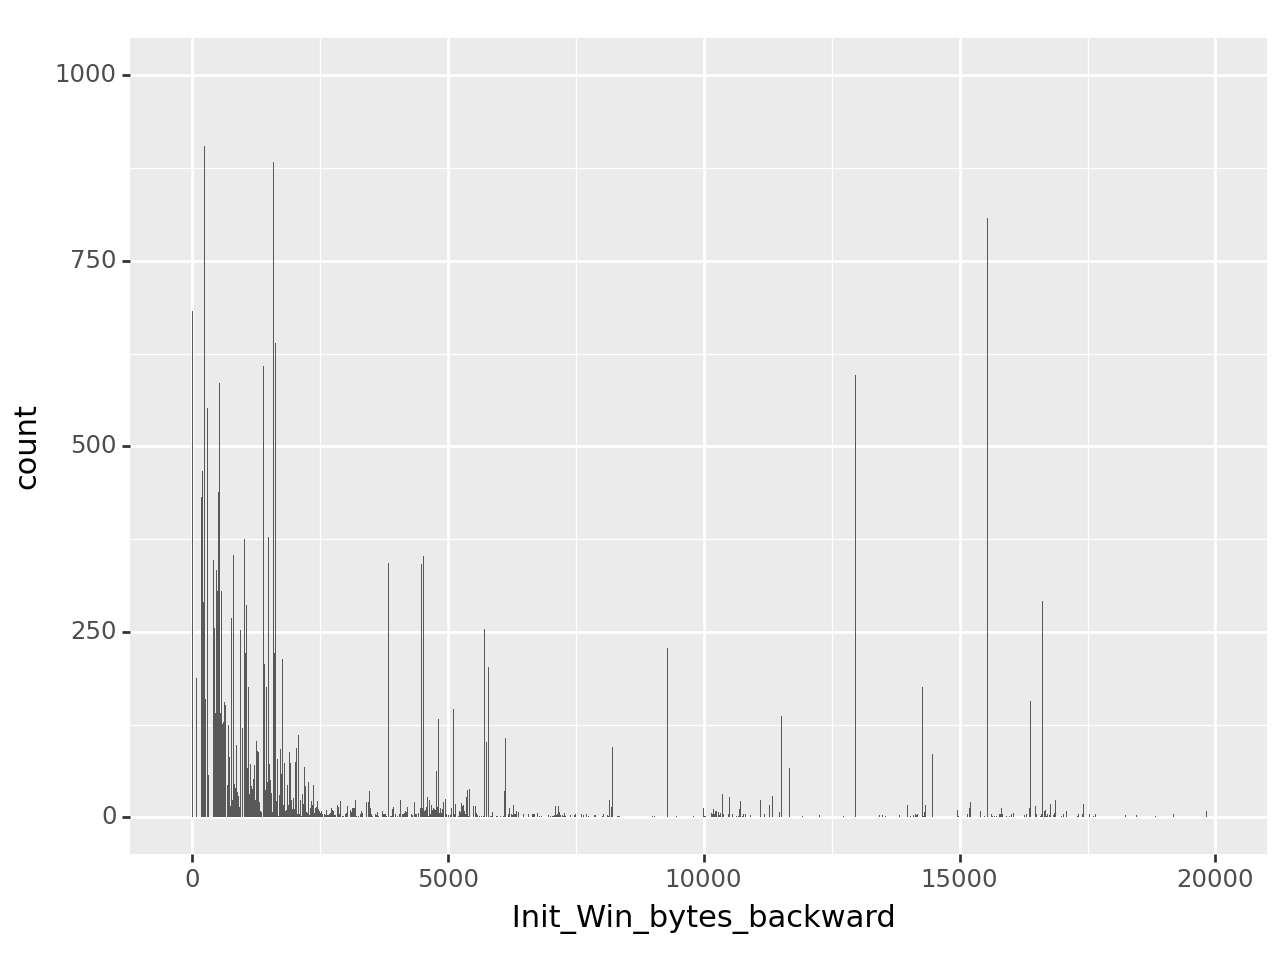

<Figure Size: (640 x 480)>

In [18]:
(ggplot(data, aes(x = ' Init_Win_bytes_backward')) + geom_histogram() + xlim(-200, 20000) + ylim(0,1000))

##Feature Selection and Preprocessing

                              Flow Duration   Total Fwd Packets  \
 Flow Duration                     1.000000            0.085279   
 Total Fwd Packets                 0.085279            1.000000   
Total Length of Fwd Packets        0.022235            0.220813   
 Fwd IAT Min                       0.324524           -0.019871   
 Bwd IAT Min                       0.147830           -0.006532   
Flow Bytes/s                      -0.045589            0.016291   
 Flow Packets/s                   -0.070344           -0.011157   
 Fwd Header Length                 0.001433           -0.009406   
 Flow IAT Min                      0.310028           -0.020426   
 Source Port                       0.101013            0.034469   

                             Total Length of Fwd Packets   Fwd IAT Min  \
 Flow Duration                                  0.022235      0.324524   
 Total Fwd Packets                              0.220813     -0.019871   
Total Length of Fwd Packets             

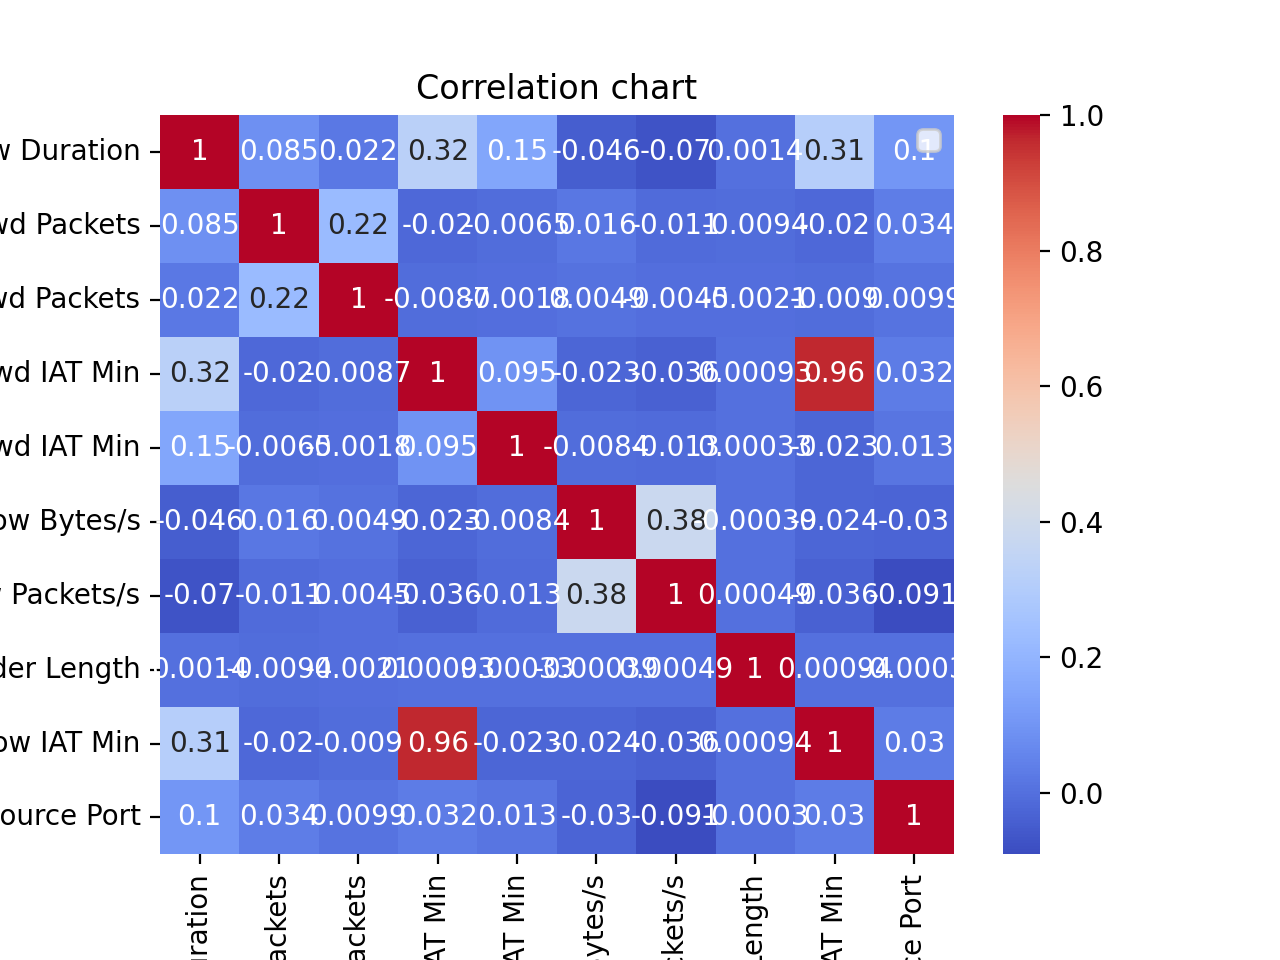

In [19]:
selected_columns = [' Flow Duration', ' Total Fwd Packets',
                    'Total Length of Fwd Packets', ' Fwd IAT Min',
        ' Bwd IAT Min', 'Flow Bytes/s', ' Flow Packets/s',
                    ' Fwd Header Length', " Flow IAT Min", ' Source Port']
df_corr = data[selected_columns]

corr_matrix = df_corr.corr()
print(corr_matrix)

sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation chart")
plt.legend()
plt.show()

In [20]:
data[' Source IP'].astype(str)

count = 0
for index, row in data.iterrows():
    value = row[' Source IP']
    if value != '10.42.0.211' and value != '10.42.0.151' and value != '10.42.0.42' and value != '8.6.0.1' and value != '10.42.0.1':
      value = 'Other'
      data.at[index, ' Source IP']= value



In [21]:
data[' Source IP'].value_counts()

10.42.0.211    178753
10.42.0.151    120170
Other           34881
10.42.0.42      17957
8.6.0.1          2097
10.42.0.1        1768
Name:  Source IP, dtype: int64

In [22]:
data[' Protocol'].value_counts()
data[' Protocol'] = data[' Protocol'].astype(str)


In [23]:
#data.head(30)

In [24]:
dummy_df = pd.get_dummies(data[[' Source IP', ' Protocol','Label']])
dummy_df.columns


Index([' Source IP_10.42.0.1', ' Source IP_10.42.0.151',
       ' Source IP_10.42.0.211', ' Source IP_10.42.0.42', ' Source IP_8.6.0.1',
       ' Source IP_Other', ' Protocol_0.0', ' Protocol_17.0', ' Protocol_6.0',
       'Label_Android_Adware', 'Label_Android_SMS_Malware',
       'Label_Android_Scareware', 'Label_Benign'],
      dtype='object')

In [25]:
columns_to_convert =[' Protocol_0.0', ' Protocol_17.0', ' Protocol_6.0', ' Source IP_10.42.0.1', ' Source IP_10.42.0.151',
       ' Source IP_10.42.0.211', ' Source IP_10.42.0.42', ' Source IP_8.6.0.1',
       ' Source IP_Other', 'Label_Android_Adware', 'Label_Android_SMS_Malware',
       'Label_Android_Scareware', 'Label_Benign']


for column_name in columns_to_convert:
  dummy_df[column_name] = dummy_df[column_name].astype(int)


In [26]:
malware = pd.concat((dummy_df, data), axis=1)

In [27]:
#dropping original columns
malware = malware.drop([' Source IP', ' Protocol','Label'], axis=1)


In [28]:
print(malware.shape)

malware.columns

(355626, 37)


Index([' Source IP_10.42.0.1', ' Source IP_10.42.0.151',
       ' Source IP_10.42.0.211', ' Source IP_10.42.0.42', ' Source IP_8.6.0.1',
       ' Source IP_Other', ' Protocol_0.0', ' Protocol_17.0', ' Protocol_6.0',
       'Label_Android_Adware', 'Label_Android_SMS_Malware',
       'Label_Android_Scareware', 'Label_Benign', ' Packet Length Mean',
       ' Flow Duration', ' Total Fwd Packets', 'Total Length of Fwd Packets',
       ' Fwd IAT Min', ' Bwd IAT Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Fwd Header Length', 'FIN Flag Count', ' SYN Flag Count',
       ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' ECE Flag Count', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', ' act_data_pkt_fwd', 'Active Mean',
       'Idle Mean', ' Destination IP', ' Source Port', ' Flow IAT Min'],
      dtype='object')

##Models

In [29]:
cont= [' Flow Duration', ' Total Fwd Packets',
        'Total Length of Fwd Packets',
        ' Fwd IAT Min',
        ' Bwd IAT Min', 'Flow Bytes/s', ' Flow Packets/s',
        ' Fwd Header Length',' Source Port',' Flow IAT Min', ' Fwd IAT Min']
predictors = [' Protocol_0.0', ' Protocol_17.0', ' Protocol_6.0',' Source IP_10.42.0.1', ' Source IP_10.42.0.151',
              ' Source IP_10.42.0.211', ' Source IP_10.42.0.42', ' Source IP_8.6.0.1',
              ' Source IP_Other',' Packet Length Mean',
              ' Flow Duration', ' Total Fwd Packets',
              'Total Length of Fwd Packets',
              ' Fwd IAT Min', ' Bwd IAT Min', 'Flow Bytes/s', ' Flow Packets/s',
              ' Fwd Header Length', 'FIN Flag Count',
              ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count',
              ' ACK Flag Count', ' URG Flag Count', ' ECE Flag Count',
              'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
              ' act_data_pkt_fwd', 'Active Mean', 'Idle Mean',' Source Port', ' Flow IAT Min', ' Fwd IAT Min']

classifiers = ['Label_Android_Adware','Label_Android_SMS_Malware','Label_Android_Scareware', 'Label_Benign']
X = malware[predictors]
y = malware[classifiers]

z = MinMaxScaler()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# X_train, y_train: Training data
# X_valid, y_valid: Validation data
# X_test, y_test: Test data

X_train[cont] = z.fit_transform(X_train[cont])
X_valid[cont] = z.transform(X_valid[cont])
X_test[cont] = z.transform(X_test[cont])

###Model 1

In [30]:
model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(4, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_data=(X_valid, y_valid))

scores = model.evaluate(X_valid,(y_valid))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
278/278 [==============================] - 2s 6ms/step - loss: 25213.9941 - accuracy: 0.3492 - val_loss: 5636.0918 - val_accuracy: 0.3693
Epoch 2/10
278/278 [==============================] - 1s 4ms/step - loss: 10045.2314 - accuracy: 0.3716 - val_loss: 13553.1172 - val_accuracy: 0.2666
Epoch 3/10
278/278 [==============================] - 1s 3ms/step - loss: 13394.2295 - accuracy: 0.3747 - val_loss: 26957.4629 - val_accuracy: 0.3989
Epoch 4/10
278/278 [==============================] - 1s 3ms/step - loss: 12337.2295 - accuracy: 0.3729 - val_loss: 19141.2441 - val_accuracy: 0.3781
Epoch 5/10
278/278 [==============================] - 1s 3ms/step - loss: 13828.5947 - accuracy: 0.3818 - val_loss: 8007.2085 - val_accuracy: 0.4050
Epoch 6/10
278/278 [==============================] - 1s 3ms/step - loss: 9911.3271 - accuracy: 0.3815 - val_loss: 16382.0186 - val_accuracy: 0.2642
Epoch 7/10
278/278 [==============================] - 1s 3ms/step - loss: 11784.9756 - accuracy: 0.3848

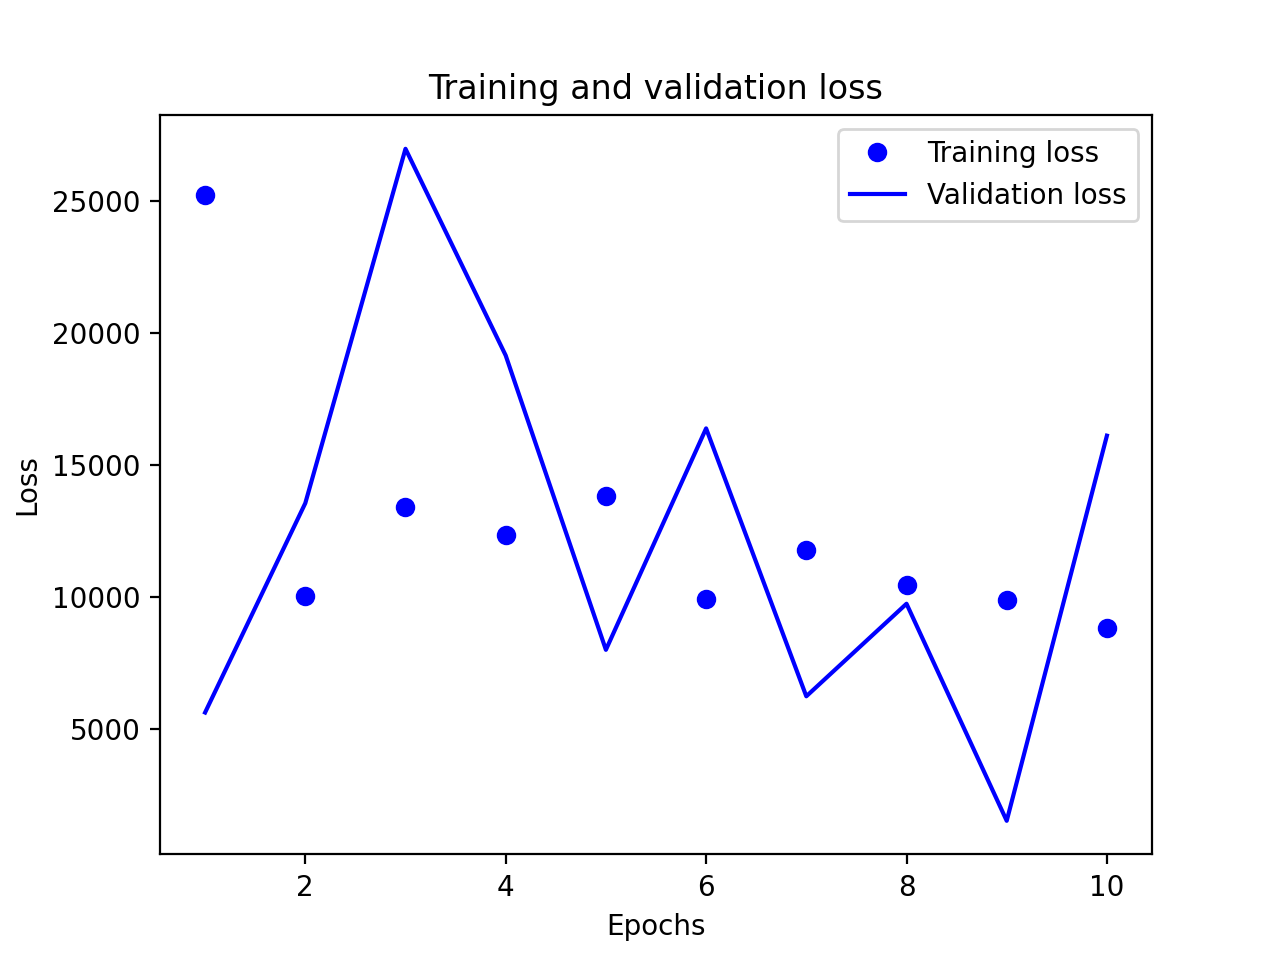

In [31]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

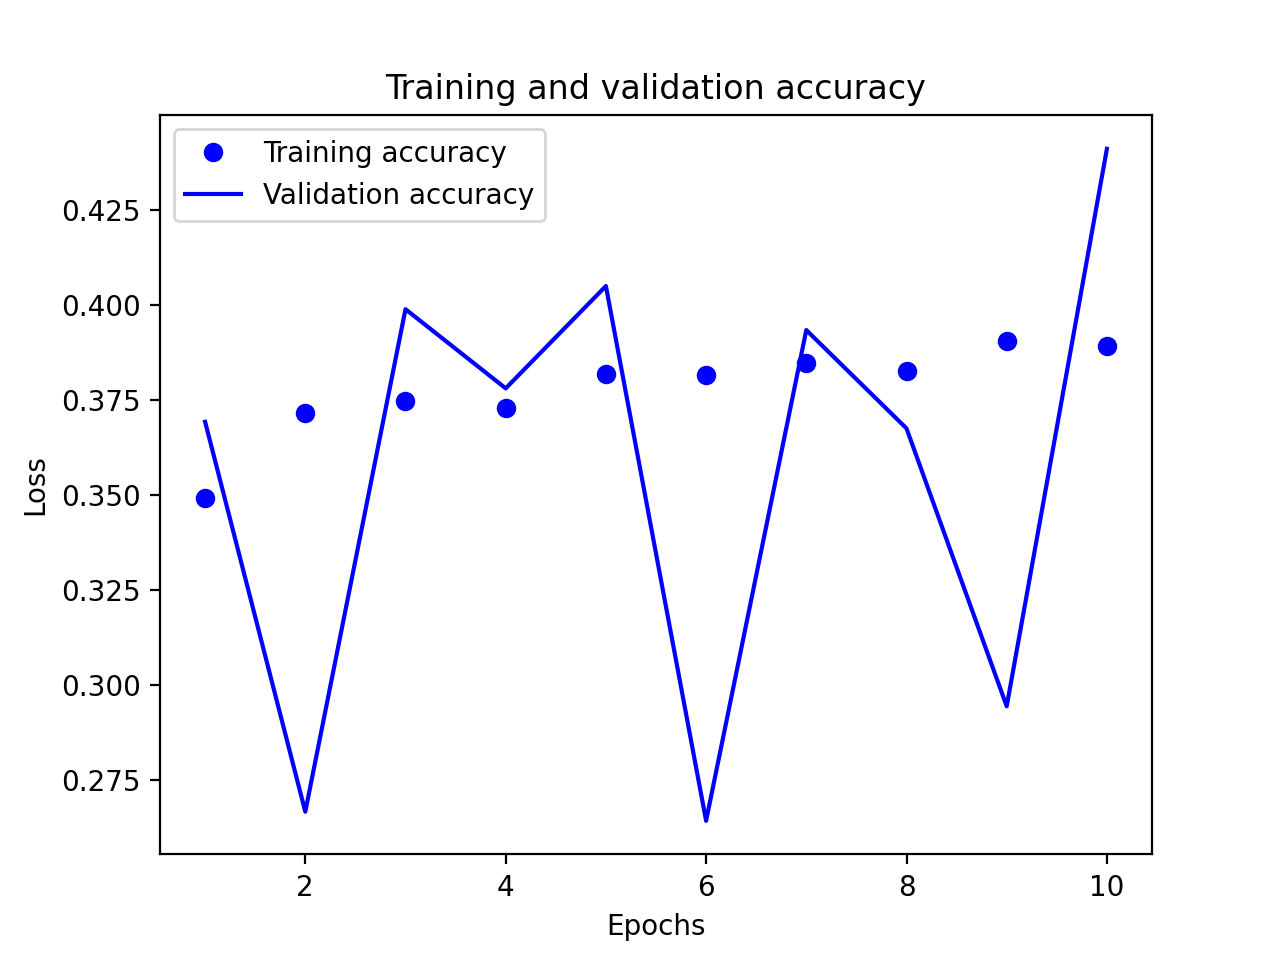

In [32]:
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

##Model 2

In [33]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(4, activation="softmax")
])

# Using a different optimizer with a different learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,  # Smaller batch size for potential faster convergence
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

scores = model.evaluate(X_valid,(y_valid))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
556/556 [==============================] - 7s 11ms/step - loss: 13304.9463 - accuracy: 0.3570 - val_loss: 469.8887 - val_accuracy: 0.4231
Epoch 2/10
556/556 [==============================] - 6s 11ms/step - loss: 208.9172 - accuracy: 0.3849 - val_loss: 10.8383 - val_accuracy: 0.4073
Epoch 3/10
556/556 [==============================] - 7s 13ms/step - loss: 13.4370 - accuracy: 0.3981 - val_loss: 7.3982 - val_accuracy: 0.4304
Epoch 4/10
556/556 [==============================] - 7s 12ms/step - loss: 8.7658 - accuracy: 0.4067 - val_loss: 3.3917 - val_accuracy: 0.4262
Epoch 5/10
556/556 [==============================] - 6s 10ms/step - loss: 3.5860 - accuracy: 0.4139 - val_loss: 2.6754 - val_accuracy: 0.4251
Epoch 6/10
556/556 [==============================] - 6s 11ms/step - loss: 2.6640 - accuracy: 0.4123 - val_loss: 4.2305 - val_accuracy: 0.4324
Epoch 7/10
556/556 [==============================] - 6s 11ms/step - loss: 2.6103 - accuracy: 0.4147 - val_loss: 1.8617 - val_accura

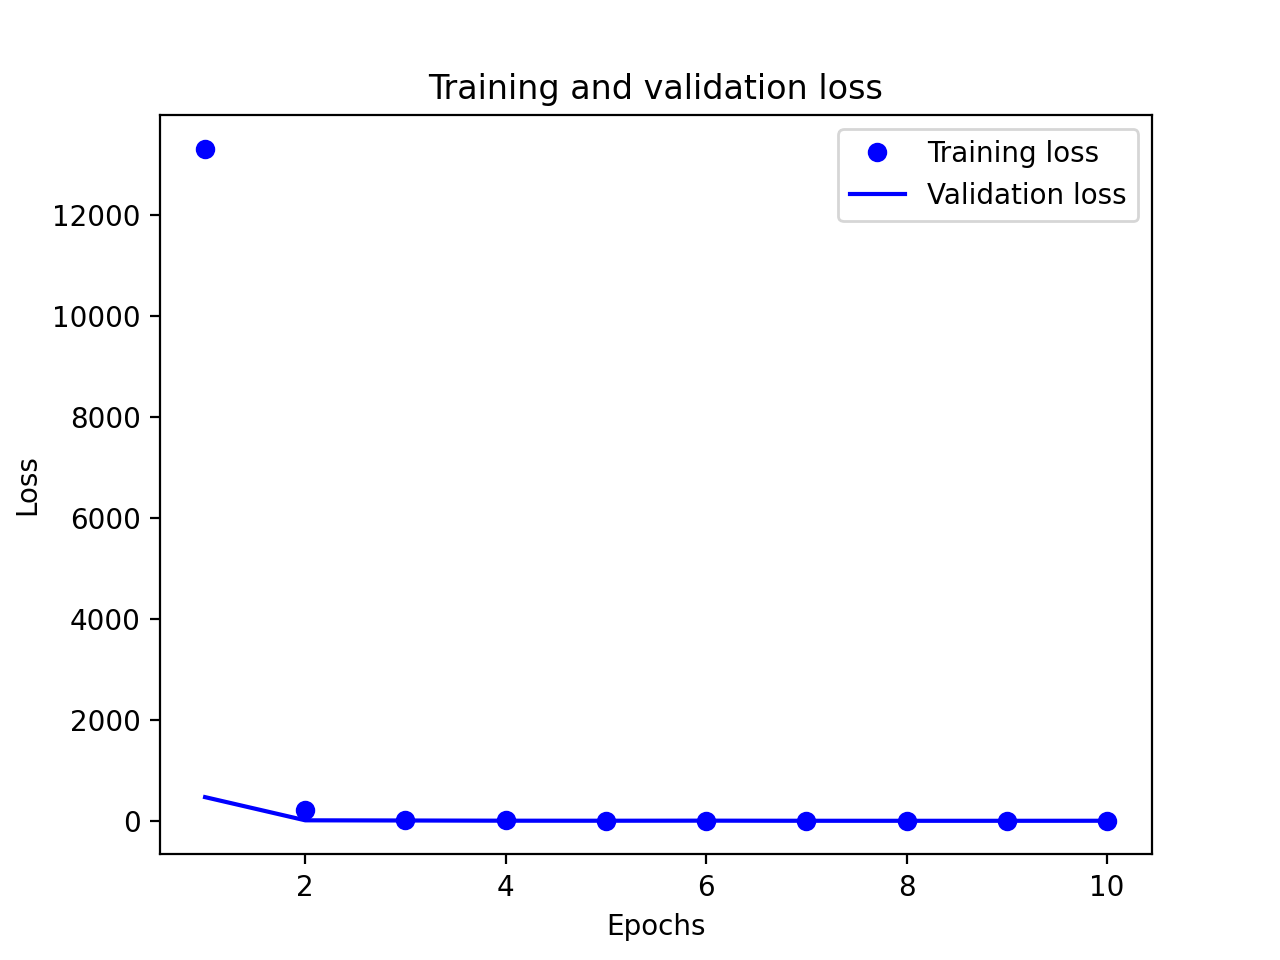

In [34]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

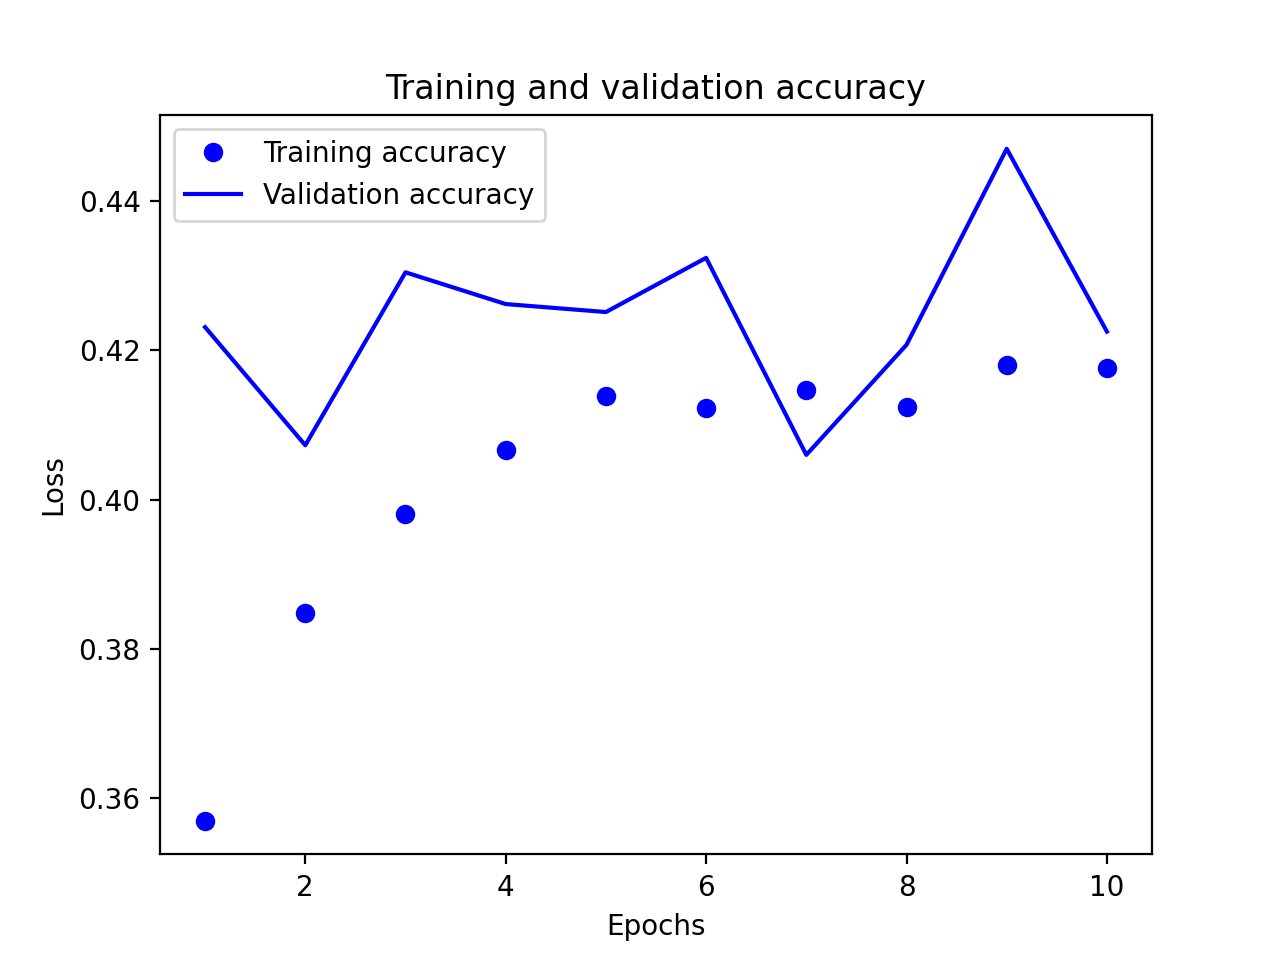

In [35]:
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Model 3

In [36]:
from keras.regularizers import l2

In [37]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    layers.Dense(4, activation="softmax")
])

# Using a different optimizer with a different learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,  # Smaller batch size for potential faster convergence
                    validation_data=(X_valid, y_valid),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

scores = model.evaluate(X_valid,(y_valid))
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

Epoch 1/10
556/556 [==============================] - 8s 13ms/step - loss: 7660.7949 - accuracy: 0.3552 - val_loss: 947.9661 - val_accuracy: 0.2916
Epoch 2/10
556/556 [==============================] - 6s 11ms/step - loss: 597.3032 - accuracy: 0.3848 - val_loss: 940.2623 - val_accuracy: 0.4033
Epoch 3/10
556/556 [==============================] - 7s 12ms/step - loss: 151.0748 - accuracy: 0.3992 - val_loss: 3.3016 - val_accuracy: 0.3806
Epoch 4/10
556/556 [==============================] - 7s 13ms/step - loss: 6.8432 - accuracy: 0.4072 - val_loss: 2.4903 - val_accuracy: 0.4161
Epoch 5/10
556/556 [==============================] - 6s 12ms/step - loss: 3.4014 - accuracy: 0.4090 - val_loss: 4.3160 - val_accuracy: 0.3815
Epoch 6/10
556/556 [==============================] - 7s 12ms/step - loss: 2.5486 - accuracy: 0.4113 - val_loss: 3.5415 - val_accuracy: 0.4153
Epoch 7/10
556/556 [==============================] - 6s 11ms/step - loss: 3.4013 - accuracy: 0.4153 - val_loss: 1.7653 - val_accur

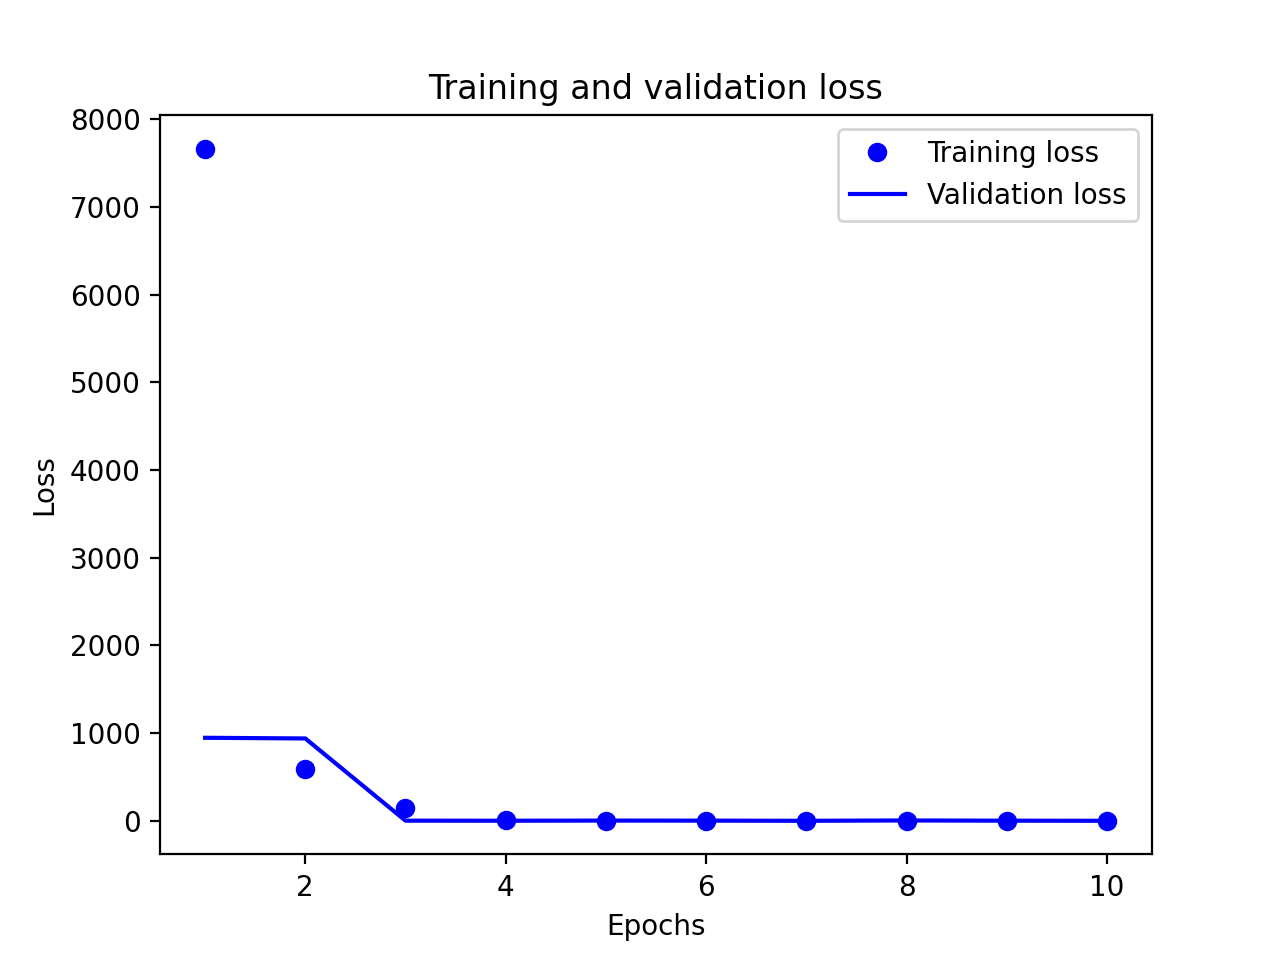

In [38]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

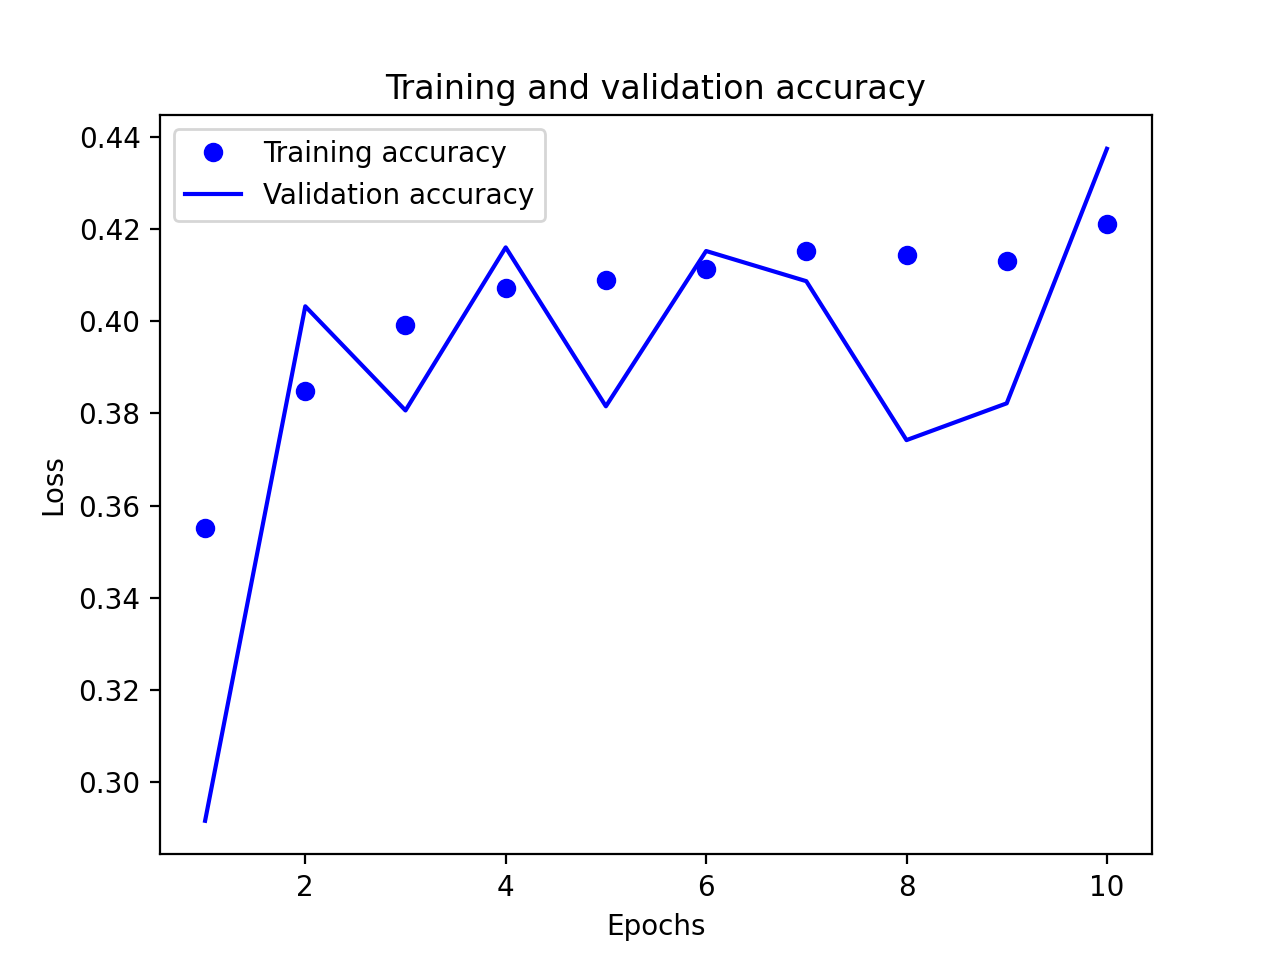

In [39]:
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values) + 1)
plt.plot(epochs, accuracy_values, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [40]:
y_pred = np.argmax(model.predict(X_test), axis=-1)#store indices of pred words w/ highest prob
y_pred = to_categorical(y_pred, num_classes=4)  # Adjust num_classes according to your problem

#print(y_pred)
#print(y_test)

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)

print(precision)
print(recall)
print(accuracy)


1112/1112 [==============================] - 1s 1ms/step
[0.43311524 0.88059701 0.43817079 0.        ]
[0.90528739 0.05353092 0.15932807 0.        ]
0.4387706323988415


In [41]:
from sklearn.metrics import confusion_matrix


In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are DataFrames
# Convert one-hot encoded labels to class indices
y_true_indices = np.argmax(np.array(y_test), axis=-1)
y_pred_indices = np.argmax(np.array(y_pred), axis=-1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_indices, y_pred_indices)
cm_df = pd.DataFrame(conf_matrix,
                     index = ['Class 1','Class 2','Class 3', 'Class 4'],
                     columns = ['Class 1','Class 2','Class 3', 'Class 4'])

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[13372     1  1398     0]
 [ 5595   354   664     0]
 [ 9862    46  1878     1]
 [ 2045     1   346     0]]


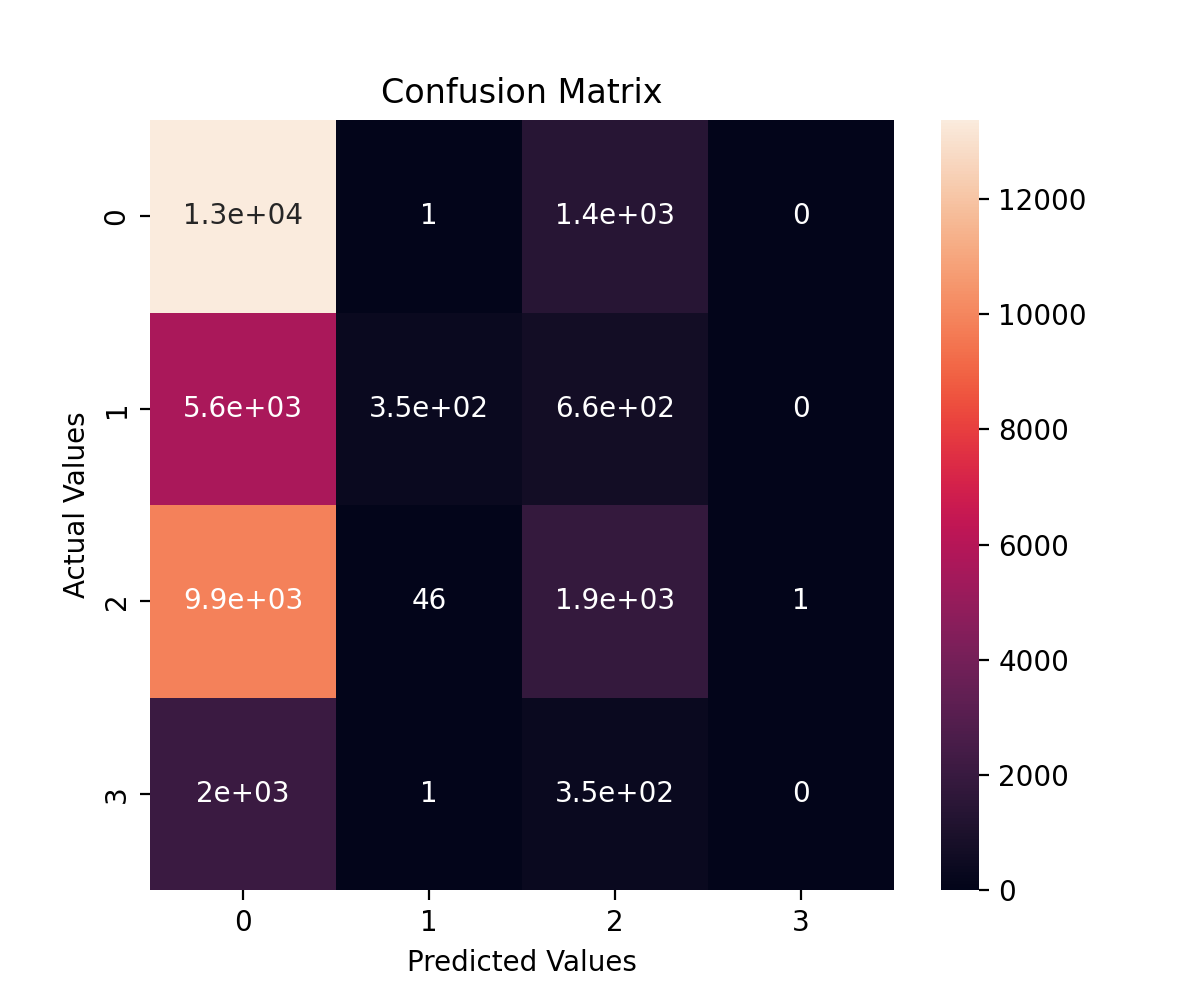

In [43]:
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()